#### Algoritmo Genetico que encuentra el minimo de la funcion x^2
- en el intervalo [-31, 31]
-  Selección por ruleta, ranking lineal y torneo
- Pc = 0.85
- Pm = 0.09
- Iteraciones o generaciones = 10

#### Librerias:

In [1]:
import random
import itertools
from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")
plt.style.use('dark_background')

#### A tener encuenta para el metodo por ruleta

In [61]:
'''Algoritmo Genético que encuentra el mínimo de la función objetivo x^2 en el
intervalo [-31, 31]
El rango dado por [-31, 31] es 62 es decir: X_MIN - XMAX por tanto el rango
debe ser contenido por un exponente de 2 tal que 2^exponente >= 62, en este
caso exponente = 6, es decir 2^6=64, ( log2(62)=5.95 ) de este modo obtengo la
longitud del cromosoma, luego solo resta mapear lso cromosomas binarios en el
rango [-31, 31]
Para mapear se usa la fórmula:
x=X_MIN+decimal(valor_binario)*(X_MAX - X_MIN)/((2 ** LONGITUD_CROMOSOMA) - 1)
#  -----------------------------------------------------------------
Si necesito trabajar con números reales para obtener mas precisión se procede
igual pero se debe multiplicar el rango por 10 si quiero tener un dígito
decimal, x100 para 2 dígitos decimales, etc. En este caso, el rango es 62,
multiplicado por 10 (para que proporcione 1 dígito decimal) es 620.
Para saber la dimensión del cromosoma debo despejar el exponente de
2^exponente = 620 , log2(620)=9.28
es decir que el valor que contiene a 620 es exponente=10; 2^10=1024
debo por tanto cambiar la constante LONGITUD_CROMOSOMA = 10, de ese modo ahora
el intervalo será real con 1 dígito [-31.0, 31.0]'''

'Algoritmo Genético que encuentra el mínimo de la función objetivo x^2 en el\nintervalo [-31, 31]\nEl rango dado por [-31, 31] es 62 es decir: X_MIN - XMAX por tanto el rango\ndebe ser contenido por un exponente de 2 tal que 2^exponente >= 62, en este\ncaso exponente = 6, es decir 2^6=64, ( log2(62)=5.95 ) de este modo obtengo la\nlongitud del cromosoma, luego solo resta mapear lso cromosomas binarios en el\nrango [-31, 31]\nPara mapear se usa la fórmula:\nx=X_MIN+decimal(valor_binario)*(X_MAX - X_MIN)/((2 ** LONGITUD_CROMOSOMA) - 1)\n#  -----------------------------------------------------------------\nSi necesito trabajar con números reales para obtener mas precisión se procede\nigual pero se debe multiplicar el rango por 10 si quiero tener un dígito\ndecimal, x100 para 2 dígitos decimales, etc. En este caso, el rango es 62,\nmultiplicado por 10 (para que proporcione 1 dígito decimal) es 620.\nPara saber la dimensión del cromosoma debo despejar el exponente de\n2^exponente = 620 , lo

#### Parametros

In [62]:
TAMANIO_POBLACION = 4
LONGITUD_CROMOSOMA = 10
TASA_MUTACION = 0.09
TASA_CRUCE = 0.85
GENERACIONES = 10
X_MIN = -31
X_MAX = 31
EPSILON = 0.001  # valor pequeño para evitar division por cero en la funcion fitness
TAMANIO_TORNEO = 3  # tamaño del torneo

#### funcion para mapear el valor binario a un rango [-31, 31]

In [63]:
def binario_a_decimal(cromosoma):
    decimal = int(cromosoma, 2)
    x = X_MIN + decimal * (X_MAX - X_MIN) / ((2 ** LONGITUD_CROMOSOMA) - 1)
    return x

#### funcion objetivo x^2

In [64]:
def funcion_objetivo(x):
    return x ** 2

#### funcion de aptitud (1/(x^2 + epsilon))

In [65]:
def aptitud(cromosoma):
    x = binario_a_decimal(cromosoma)
    return 1 / (funcion_objetivo(x) + EPSILON)

#### Inicializar la población

In [66]:
def inicializar_poblacion(tamanio_poblacion, longitud_cromosoma):
    poblacion = []
    for tp in range(tamanio_poblacion):
        cromosoma = ""
        for lc in range(longitud_cromosoma):
            #  se crean los cromosomas alelo por alelo en forma aleatoria
            #  hasta completar toda la poblacion
            cromosoma = cromosoma + str(random.randint(0, 1))
        poblacion.append(cromosoma)
    return poblacion

#### Selección por ruleta

In [67]:
def seleccion_ruleta(poblacion, aptitud_total):
    probabilidades = []
    for individuo in poblacion:
        prob = aptitud(individuo) / aptitud_total
        probabilidades.append(prob)

    probabilidades_acumuladas = []
    suma = 0
    for prob in probabilidades:
        suma += prob
        probabilidades_acumuladas.append(suma)

    r = random.random()
    for i, acumulada in enumerate(probabilidades_acumuladas):
        if r <= acumulada:
            return poblacion[i]

#### Selección por ranking

In [68]:
def seleccion_ranking(poblacion):
    # se calcula la aptitud de cada individuo
    aptitudes = []
    for individuo in poblacion:
        aptitudes.append(aptitud(individuo))

    # se ordena la poblacion por aptitud (mayor aptitud es mejor)
    # x es la tupla de zip, de la cual se toma el segundo elemento (x[1]) para
    # ser ordenada la tupla por ese elemento, en este caso por aptitud
    poblacion_ordenada = sorted(zip(poblacion, aptitudes), key=lambda x: x[1])

    # se calcula probabilidades segun el ranking lineal
    N = len(poblacion)
    s = 1.7  # Factor de seleccion comunmente usado
    probabilidades = []
    for i in range(N):
        prob = (2 - s) / N + (2 * i * (s - 1)) / (N * (N - 1))
        probabilidades.append(prob)

    # se selecciona un progenitor basado en las probabilidades
    r = random.random()
    suma = 0
    for i in range(N):
        suma = suma + probabilidades[i]
        if r <= suma:
            return poblacion_ordenada[i][0]  # se retornar el cromosomas

#### Seleción por torneo

In [69]:
def seleccion_torneo(poblacion, tamanio_torneo=TAMANIO_TORNEO):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud)  # se selecciona el mejor individuo del torneo
        progenitores.append(progenitor)
    return progenitores

#### Cruce monopunto con probabilidad de cruza pc = 0.92

In [70]:
def cruce_mono_punto(progenitor1, progenitor2, tasa_cruce):
    if random.random() < tasa_cruce:
        punto_cruce = random.randint(1, len(progenitor1) - 1)  # elijo aleatoriamente un punto de cruce
        descendiente1 = progenitor1[:punto_cruce] + progenitor2[punto_cruce:]
        descendiente2 = progenitor2[:punto_cruce] + progenitor1[punto_cruce:]
    else:
        descendiente1, descendiente2 = progenitor1, progenitor2
    return descendiente1, descendiente2

#### mutacion

In [71]:
def mutacion(cromosoma, tasa_mutacion):
    cromosoma_mutado = ""
    for bit in cromosoma:  # aqui se itera cada gen del cromosoma recibido
        if random.random() < tasa_mutacion:
            # se produce la mutacion de un alelo si es que el numero aleatorio generado
            # es inferior que tasa_mutacion tambien llamado "pm" (prob.de mutacion)
            cromosoma_mutado = cromosoma_mutado + str(int(not int(bit)))
        else:
            cromosoma_mutado = cromosoma_mutado + bit
    return cromosoma_mutado

#### aplicacion de operadores geneticos


In [72]:
def algoritmo_genetico_ranking_lineal(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # seleccion de progenitores con el metodo de ranking lineal
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ranking(poblacion))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        #  -----------------------------------------------------------------
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la población con los descendientes mutados
        poblacion = descendientes_mutados

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)  # se retorna el mejor individuo

In [73]:
def algoritmo_genetico_torneo(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        #  -----------------------------------------------------------------
        # Seleccion de progenitores con el metodo torneo
        progenitores = seleccion_torneo(poblacion)

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la poblacion con los descendientes mutados
        poblacion = descendientes_mutados

        # se muestra el mejor individuo de la generacion
        mejor_individuo = min(poblacion, key=aptitud)  # Buscar el mínimo para la aptitud
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud)  # Retornar el mejor individuo

In [74]:
def algoritmo_genetico_ruleta(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # se calcula aptitud total para luego
        aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)

        print("Aptitud total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aquí se aplica elitismo
        # Se reemplazan los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)  # se ordena la poblacion por aptitud en forma ascendente
        # se ordena los descendientes por aptitud en forma descendente
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)  # Buscar el maximo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))

        print("mi", mejor_individuo)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    # plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
    # plt.xlabel('Generación')
    # plt.ylabel('Valor de la Función Objetivo')
    # plt.title('Curva de Convergencia del Algoritmo Genético')
    # plt.grid(True)
    # plt.show()
    return max(poblacion, key=aptitud)  # se retorna el mejor individuo

#### algoritmo genetico ejecucion principal

In [75]:
# ruleta
mejores_soluciones = []
for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion = algoritmo_genetico_ruleta(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    mejores_soluciones.append(binario_a_decimal(mejor_solucion))

print(mejores_soluciones)

_________________________________________________________________________________

Generación: 1
Aptitud total: 2.4733220434938907
mi 0111110101
Mejor individuo: -0.6363636363636367 Aptitud: 2.4633049001445384
_________________________________________________________________________________
Generación: 2
Aptitud total: 7.555867950991479
mi 0111110101
Mejor individuo: -0.6363636363636367 Aptitud: 2.4633049001445384
_________________________________________________________________________________
Generación: 3
Aptitud total: 9.853219600578154
mi 0111110101
Mejor individuo: -0.6363636363636367 Aptitud: 2.4633049001445384
_________________________________________________________________________________
Generación: 4
Aptitud total: 9.853219600578154
mi 0111110101
Mejor individuo: -0.6363636363636367 Aptitud: 2.4633049001445384
_________________________________________________________________________________
Generación: 5
Aptitud total: 9.853219600578154
mi 0111111001
Mejor individuo: -0.393

In [76]:
# torneo
mejores_soluciones = []

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion = algoritmo_genetico_torneo(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    mejores_soluciones.append(binario_a_decimal(mejor_solucion))

print(mejores_soluciones)

_________________________________________________________________________________

Generación: 1
Mejor individuo: 6.81818181818182 Aptitud: 0.021510648393163443
_________________________________________________________________________________
Generación: 2
Mejor individuo: -30.515151515151516 Aptitud: 0.0010739114485694798
_________________________________________________________________________________
Generación: 3
Mejor individuo: -29.78787878787879 Aptitud: 0.0011269907581552354
_________________________________________________________________________________
Generación: 4
Mejor individuo: 0.7575757575757578 Aptitud: 1.7393693228917926
_________________________________________________________________________________
Generación: 5
Mejor individuo: 19.666666666666664 Aptitud: 0.0025854572625350876
_________________________________________________________________________________
Generación: 6
Mejor individuo: 25.363636363636367 Aptitud: 0.0015544483230142583
__________________________

In [77]:
# ranking
mejores_soluciones = []

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion = algoritmo_genetico_ranking_lineal(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    mejores_soluciones.append(binario_a_decimal(mejor_solucion))

print(mejores_soluciones)

_________________________________________________________________________________

Generación: 1
Mejor individuo: -6.575757575757574 Aptitud: 0.02312588536411559
_________________________________________________________________________________
Generación: 2
Mejor individuo: -6.575757575757574 Aptitud: 0.02312588536411559
_________________________________________________________________________________
Generación: 3
Mejor individuo: -2.6969696969696955 Aptitud: 0.13746374220234098
_________________________________________________________________________________
Generación: 4
Mejor individuo: -2.6969696969696955 Aptitud: 0.13746374220234098
_________________________________________________________________________________
Generación: 5
Mejor individuo: 1.424242424242422 Aptitud: 0.49274033760631514
_________________________________________________________________________________
Generación: 6
Mejor individuo: -2.4545454545454533 Aptitud: 0.16595325055786367
_______________________________

### Ejercicio 2_d

- Vamos a usar un enfoque GridSearch con la siguiente combinación:
    - Pm : [0.01, 0.05, 0.1, 0.2]
    - Tamaño de la población: [4, 6, 8, 10]
    - Número de generaciones: [10, 15, 20, 30]  
    Probar todas estas combinaciones será costoso.  
- Para evaluar el rendimiento usaremos el mejor valor de la función objetivo.  

#### Optimización Algortimo ruleta

In [87]:
# aptitud inicial, al ponemos en 0 para que se pueda superar
best_apt = 0

# grilla
pm = [0.01, 0.05, 0.09, 0.1, 0.2]
t_p = [4, 6, 8, 10, 20]
n_g = [6, 10, 15, 20, 30] 

for pm_item, t_p_item, n_g_item in tqdm(itertools.product(pm, t_p, n_g)): # recorremos las combinaciones de parametros

    for i in range(30): # 30 lanzamientos
        print("_________________________________________________________________________________")
        print()
        mejor_solucion = algoritmo_genetico_ruleta(t_p_item, LONGITUD_CROMOSOMA, pm_item, TASA_CRUCE, n_g_item)
        print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))
        
        if aptitud(mejor_solucion) > best_apt: # solución mejor a la anterior

            # actualizamos la aptitud
            best_apt = aptitud(mejor_solucion)

            # guardamos los parametros
            best_param = [pm_item, t_p_item, n_g_item]

    # vamos limpiando lo que se imprime
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

print(best_param, best_apt)

[0.01, 4, 10] 521.3020584011347


#### Optimización algoritmo ranking:

In [89]:
# aptitud inicial, al ponemos en 0 para que se pueda superar
best_apt = 0

# grilla
pm = [0.01, 0.05, 0.09, 0.1, 0.2]
t_p = [4, 6, 8, 10, 20]
n_g = [6, 10, 15, 20, 30] 

for pm_item, t_p_item, n_g_item in tqdm(itertools.product(pm, t_p, n_g)): # recorremos las combinaciones de parametros

    for i in range(30): # 30 lanzamientos
        print("_________________________________________________________________________________")
        print()
        mejor_solucion = algoritmo_genetico_ranking_lineal(t_p_item, LONGITUD_CROMOSOMA, pm_item, TASA_CRUCE, n_g_item)
        print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))
        
        if aptitud(mejor_solucion) > best_apt: # solución mejor a la anterior

            # actualizamos la aptitud
            best_apt = aptitud(mejor_solucion)

            # guardamos los parametros
            best_param = [pm_item, t_p_item, n_g_item]

    # vamos limpiando lo que se imprime
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

print(best_param, best_apt)

[0.01, 4, 6] 521.3020584011347


#### Optimización algoritmo torneo:

In [90]:
# aptitud inicial, al ponemos en 0 para que se pueda superar
best_apt = 0

# grilla
pm = [0.01, 0.05, 0.09, 0.1, 0.2]
t_p = [4, 6, 8, 10, 20]
n_g = [6, 10, 15, 20, 30] 

for pm_item, t_p_item, n_g_item in tqdm(itertools.product(pm, t_p, n_g)): # recorremos las combinaciones de parametros

    for i in range(30): # 30 lanzamientos
        print("_________________________________________________________________________________")
        print()
        mejor_solucion = algoritmo_genetico_torneo(t_p_item, LONGITUD_CROMOSOMA, pm_item, TASA_CRUCE, n_g_item)
        print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))
        
        if aptitud(mejor_solucion) > best_apt: # solución mejor a la anterior

            # actualizamos la aptitud
            best_apt = aptitud(mejor_solucion)

            # guardamos los parametros
            best_param = [pm_item, t_p_item, n_g_item]

    # vamos limpiando lo que se imprime
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

print(best_param, best_apt)

[0.01, 4, 6] 521.3020584011347


#### Punto f

- Para hacer los graficos vamos a modificar las funciones para que nos devuelva una lista con los valores del mejor lanzamiento.. 

In [115]:
def algoritmo_genetico_ruleta(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # se calcula aptitud total para luego
        aptitud_total = sum(aptitud(cromosoma) for cromosoma in poblacion)

        print("Aptitud total:", aptitud_total)

        #  -----------------------------------------------------------------
        # seleccion de progenitores con el metodo ruleta
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ruleta(poblacion, aptitud_total))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, tamanio_poblacion, 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # Aquí se aplica elitismo
        # Se reemplazan los peores cromosomas con los mejores progenitores
        poblacion.sort(key=aptitud)  # se ordena la poblacion por aptitud en forma ascendente
        # se ordena los descendientes por aptitud en forma descendente
        descendientes_mutados.sort(key=aptitud, reverse=True)
        for i in range(len(descendientes_mutados)):
            if aptitud(descendientes_mutados[i]) > aptitud(poblacion[i]):
                poblacion[i] = descendientes_mutados[i]

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)  # Buscar el maximo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))

        print("mi", mejor_individuo)
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    # Graficar la evolución de la aptitud
    # plt.plot(range(1, generaciones + 1), mejor_funcion_objetivo_generaciones, marker='o')
    # plt.xlabel('Generación')
    # plt.ylabel('Valor de la Función Objetivo')
    # plt.title('Curva de Convergencia del Algoritmo Genético')
    # plt.grid(True)
    # plt.show()
    return max(poblacion, key=aptitud), mejor_funcion_objetivo_generaciones  # se retorna el mejor individuo

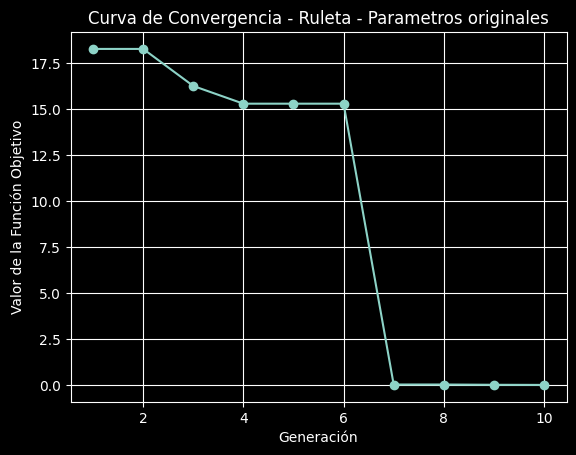

In [116]:
# ruleta
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_ruleta(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 10 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Ruleta - Parametros originales')
plt.grid(True)
plt.show()

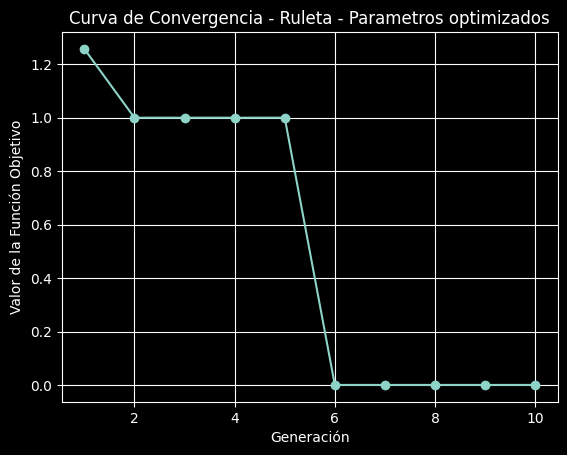

In [117]:
# ruleta
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_ruleta(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 10)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 10 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Ruleta - Parametros optimizados')
plt.grid(True)
plt.show()

In [129]:
def algoritmo_genetico_ranking_lineal(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        # seleccion de progenitores con el metodo de ranking lineal
        progenitores = []
        for _ in range(tamanio_poblacion):
            progenitores.append(seleccion_ranking(poblacion))

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        #  -----------------------------------------------------------------
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la población con los descendientes mutados
        poblacion = descendientes_mutados

        # Mostrar el mejor individuo de la generacion
        mejor_individuo = max(poblacion, key=aptitud)
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))
        
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud), mejor_funcion_objetivo_generaciones  # se retorna el mejor individuo

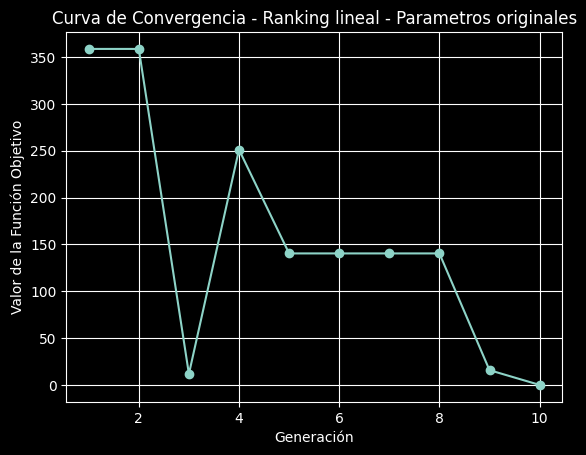

In [132]:
# ranking
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_ranking_lineal(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 10 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Ranking lineal - Parametros originales')
plt.grid(True)
plt.show()

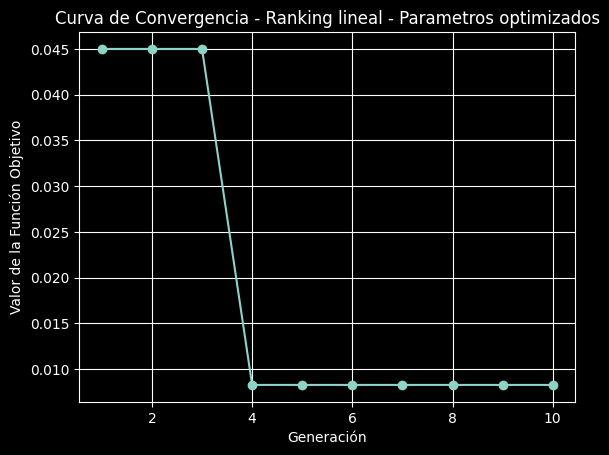

In [133]:
# Ranking
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_ranking_lineal(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 10)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 10 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Ranking lineal - Parametros optimizados')
plt.grid(True)
plt.show()

In [141]:
def algoritmo_genetico_torneo(tamanio_poblacion, longitud_cromosoma, tasa_mutacion, tasa_cruce, generaciones):
    poblacion = inicializar_poblacion(tamanio_poblacion, longitud_cromosoma)
    mejor_funcion_objetivo_generaciones = []  # Lista para almacenar la aptitud del mejor individuo y grficar luego

    for generacion in range(generaciones):
        print("Generación:", generacion + 1)

        #  -----------------------------------------------------------------
        # Seleccion de progenitores con el metodo torneo
        progenitores = seleccion_torneo(poblacion)

        #  -----------------------------------------------------------------
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_mono_punto(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])

        #  -----------------------------------------------------------------
        # Mutacion
        descendientes_mutados = []
        for descendiente in descendientes:
            descendientes_mutados.append(mutacion(descendiente, tasa_mutacion))

        # se reemplaza la poblacion con los descendientes mutados
        poblacion = descendientes_mutados

        # se muestra el mejor individuo de la generacion
        mejor_individuo = min(poblacion, key=aptitud)  # Buscar el mínimo para la aptitud
        mejor_funcion_objetivo_generaciones.append(funcion_objetivo(binario_a_decimal(mejor_individuo)))
        print("Mejor individuo:", binario_a_decimal(mejor_individuo), "Aptitud:", aptitud(mejor_individuo))
        print("_________________________________________________________________________________")

    return max(poblacion, key=aptitud), mejor_funcion_objetivo_generaciones  # Retornar el mejor individuo

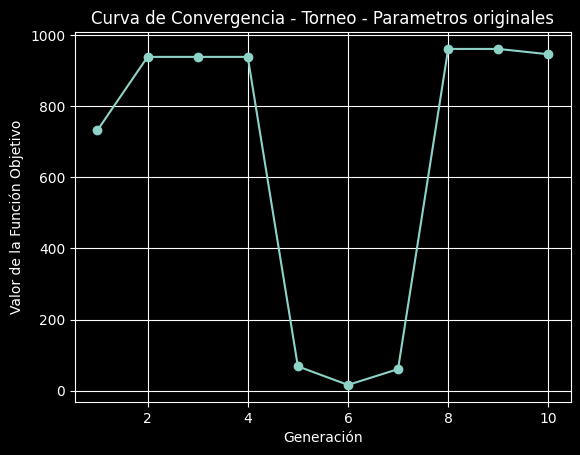

In [146]:
# torneo
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_torneo(TAMANIO_POBLACION, LONGITUD_CROMOSOMA, TASA_MUTACION, TASA_CRUCE, GENERACIONES)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 10 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Torneo - Parametros originales')
plt.grid(True)
plt.show()

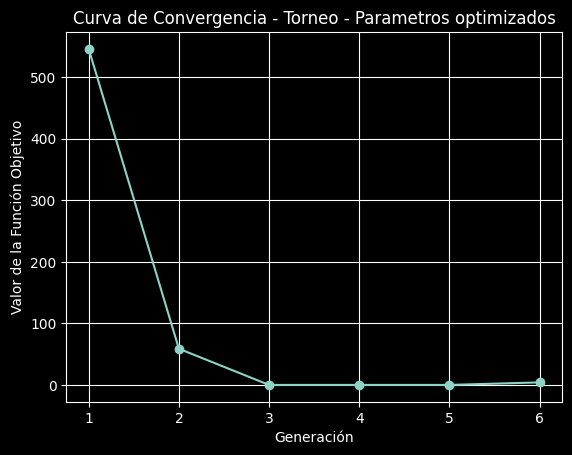

In [147]:
# Torneo
apt_initial = 0

for i in range(30):
    print("_________________________________________________________________________________")
    print()
    mejor_solucion, converge = algoritmo_genetico_torneo(4, LONGITUD_CROMOSOMA, 0.01, TASA_CRUCE, 6)
    print("Mejor solución:", binario_a_decimal(mejor_solucion), "Aptitud:", aptitud(mejor_solucion))

    # si la apt es mejor a la anterior la almacenamos
    if aptitud(mejor_solucion) > apt_initial:
        converge_list = converge
        apt_initial = aptitud(mejor_solucion)

    # limpiar la salida
    clear_output(wait=True)

# Dejamos de limpiar la salida
clear_output(wait=False)

# Graficar la evolución de la aptitud
plt.plot(range(1, 6 + 1), converge_list, marker='o')
plt.xlabel('Generación')
plt.ylabel('Valor de la Función Objetivo')
plt.title('Curva de Convergencia - Torneo - Parametros optimizados')
plt.grid(True)
plt.show()